# Backbone Summary

In [72]:
import networkx as nx
import pickle as pk
import configparser

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import powerlaw
import numpy as np

In [88]:
config = configparser.ConfigParser()
config.read('networks.ini')
networks = list(config.keys())[1:]

# Backbone Sizes

In [92]:
df = pd.DataFrame(columns=['n_nodes', 'n_edges', 'density', 'tau_metric', 'tau_ultrametric', 'ultra_per_metric'], index=networks)

for network in networks:
    folder = config[network].get('folder')
    
    rGstats = f'networks/{folder}/network-stats.csv'
    data = pd.read_csv(rGstats, index_col=0)
       
    for col in df.columns:
        df[col][network] = data[network][col]    
    #break

#display(df)
df.to_csv('Summary/BackboneStats.csv')

In [9]:
# Save to Latex
'''
df['Type'] = None
Type = {'business-faculty': 'Social',
 'cs-faculty': 'Social',
 'history-faculty': 'Social',
 'caviar-proj': 'Social',
 'celegans-her': 'Biomedical',
 'celegans-male': 'Biomedical',
 'colombia-calls': 'Social',
 'colombia-mobility': 'Technological',
 'mobility-manizales': 'Technological',
 'mobility-medellin': 'Technological',
 'tennis-loss': 'Social',
 'yeast-grn': 'Biomedical',
 'bike-sharing': 'Technological',
 'giraffe': 'Social',
 'comorbidity': 'Biomedical',
 'phone-calls': 'Social',
 'us-airports': 'Technological',
 'DDI': 'Biomedical',
 'us-weblinks': 'Technological',
 'host-pathogen': 'Biomedical'}

for network in networks:
    df['Type'][network] = Type[network]

df.reset_index(inplace=True)

df = df[['Type', 'index', 'n-nodes', 'n-edges', 'density', 'tau-metric', 'tau-ultrametric', 'ultrametric_metric_ratio',
         'LSCC-nodes', 'LSCC-edges', 'LSCC-tau-metric', 'LSCC-tau-ultrametric', 'LSCC-ultrametric_metric_ratio']]

df.sort_values(by=['Type']).to_latex('Summary/BackboneStats.tex', column_format='l|l|rrr|c|c|c|rr|c|c|c|', index_names=False)
'''

"\ndf['Type'] = None\nType = {'business-faculty': 'Social',\n 'cs-faculty': 'Social',\n 'history-faculty': 'Social',\n 'caviar-proj': 'Social',\n 'celegans-her': 'Biomedical',\n 'celegans-male': 'Biomedical',\n 'colombia-calls': 'Social',\n 'colombia-mobility': 'Technological',\n 'mobility-manizales': 'Technological',\n 'mobility-medellin': 'Technological',\n 'tennis-loss': 'Social',\n 'yeast-grn': 'Biomedical',\n 'bike-sharing': 'Technological',\n 'giraffe': 'Social',\n 'comorbidity': 'Biomedical',\n 'phone-calls': 'Social',\n 'us-airports': 'Technological',\n 'DDI': 'Biomedical',\n 'us-weblinks': 'Technological',\n 'host-pathogen': 'Biomedical'}\n\nfor network in networks:\n    df['Type'][network] = Type[network]\n\ndf.reset_index(inplace=True)\n\ndf = df[['Type', 'index', 'n-nodes', 'n-edges', 'density', 'tau-metric', 'tau-ultrametric', 'ultrametric_metric_ratio',\n         'LSCC-nodes', 'LSCC-edges', 'LSCC-tau-metric', 'LSCC-tau-ultrametric', 'LSCC-ultrametric_metric_ratio']]\n\ndf

### Comparison with Undirected

In [10]:
'''
df_wcc = pd.DataFrame(columns=['n-nodes', 'n-edges', 'n-min-edges', 'tau-metric', 'tau-min-metric', 'tau-harm-metric',
                           'tau-ultrametric', 'tau-min-ultrametric', 'tau-harm-ultrametric'], index=networks)

df_lscc = pd.DataFrame(columns=['n-nodes', 'n-edges', 'n-max-edges', 'tau-metric', 'tau-max-metric', 'tau-avg-metric',
                           'tau-ultrametric', 'tau-max-ultrametric', 'tau-avg-ultrametric'], index=networks)

for network in networks:
    folder = config[network].get('folder')
    
    rGstats = f'networks/{folder}/undirected_networks-stats.csv'
    data = pd.read_csv(rGstats, index_col=0)
    
    df_wcc['n-min-edges'][network] = data['n-edges']['min']
    df_lscc['n-max-edges'][network] = data['n-edges']['max']
    
    for btype in ['metric', 'ultrametric']:
        row_name = f'tau-edges-{btype}'
        # WCC Nets
        for net_type in ['min', 'harm']:
            col_name = f'tau-{net_type}-{btype}'
            df_wcc[col_name][network] = data[row_name][net_type]
        # LSCC Nets
        for net_type in ['max', 'avg']:
            col_name = f'tau-{net_type}-{btype}'
            df_lscc[col_name][network] = data[row_name][net_type]
            
    
    rGstats = f'networks/{folder}/network-stats.csv'
    data = pd.read_csv(rGstats, index_col=0)
    
    correct = ['n-', 'n-', '', '']
    for idx, meas in enumerate(['nodes', 'edges', 'tau-metric', 'tau-ultrametric']):
        wcc_meas = correct[idx]+meas
        df_wcc[wcc_meas][network] = data[network][wcc_meas]
        lscc_meas = 'LSCC-'+meas
        df_lscc[wcc_meas][network] = data[network][lscc_meas]
    
#print(df_wcc)
#print(df_lscc)
df_wcc.to_csv('Summary/BackboneCompareStats_WCC.csv')
df_lscc.drop(index='host-pathogen',axis=0,inplace=True) # Remove SSI which does not have an LSCC
df_lscc.to_csv('Summary/BackboneCompareStats_LSCC.csv')
'''

"\ndf_wcc = pd.DataFrame(columns=['n-nodes', 'n-edges', 'n-min-edges', 'tau-metric', 'tau-min-metric', 'tau-harm-metric',\n                           'tau-ultrametric', 'tau-min-ultrametric', 'tau-harm-ultrametric'], index=networks)\n\ndf_lscc = pd.DataFrame(columns=['n-nodes', 'n-edges', 'n-max-edges', 'tau-metric', 'tau-max-metric', 'tau-avg-metric',\n                           'tau-ultrametric', 'tau-max-ultrametric', 'tau-avg-ultrametric'], index=networks)\n\nfor network in networks:\n    folder = config[network].get('folder')\n    \n    rGstats = f'networks/{folder}/undirected_networks-stats.csv'\n    data = pd.read_csv(rGstats, index_col=0)\n    \n    df_wcc['n-min-edges'][network] = data['n-edges']['min']\n    df_lscc['n-max-edges'][network] = data['n-edges']['max']\n    \n    for btype in ['metric', 'ultrametric']:\n        row_name = f'tau-edges-{btype}'\n        # WCC Nets\n        for net_type in ['min', 'harm']:\n            col_name = f'tau-{net_type}-{btype}'\n           

### Plot Comparison - WCC

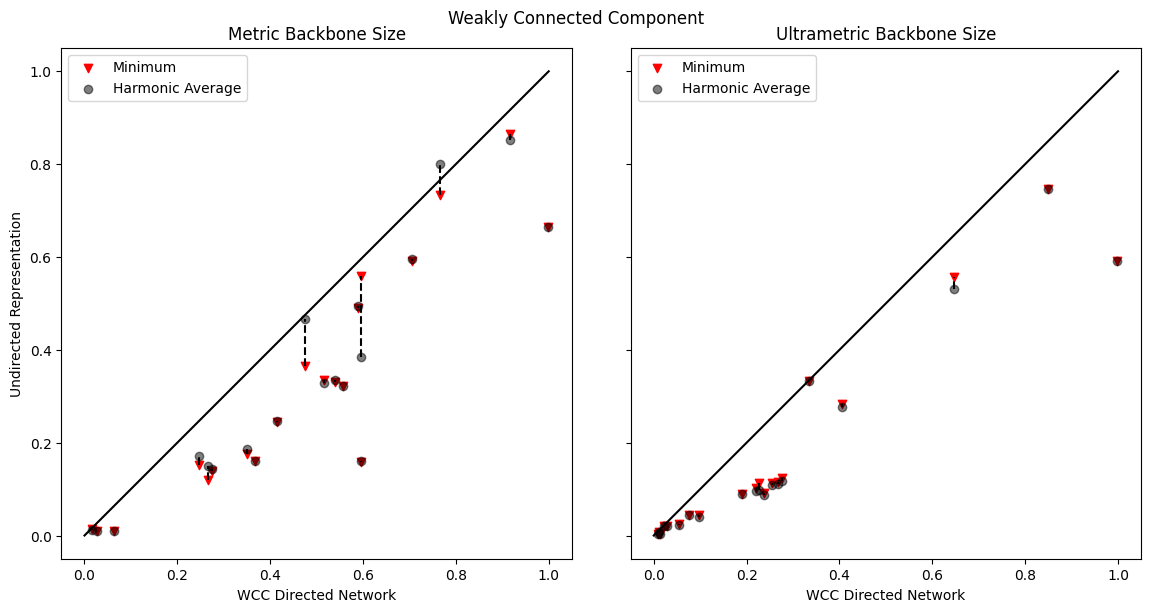

In [11]:

df = pd.read_csv('Summary/BackboneCompareStats_WCC.csv', index_col=0)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Metric Backbone
ax[0].scatter(df['tau-metric'], df['tau-min-metric'], marker='v', c='r', label='Minimum')
ax[0].scatter(df['tau-metric'], df['tau-harm-metric'], marker='o', c='k', label='Harmonic Average', alpha=0.5)

ax[0].vlines(df['tau-metric'], ymin=df[['tau-min-metric', 'tau-harm-metric']].min(axis=1), ymax=df[['tau-min-metric', 'tau-harm-metric']].max(axis=1), linestyle='--', color='k')
ax[0].plot([0, 1], [0, 1], 'k-')

ax[0].legend()
ax[0].set_xlabel('WCC Directed Network')
ax[0].set_ylabel('Undirected Representation')
ax[0].set_title('Metric Backbone Size')
ax[0].set_aspect('equal')

# Ultrametric Backbone
ax[1].scatter(df['tau-ultrametric'], df['tau-min-ultrametric'], marker='v', c='r', label='Minimum')
ax[1].scatter(df['tau-ultrametric'], df['tau-harm-ultrametric'], marker='o', c='k', label='Harmonic Average', alpha=0.5)

ax[1].vlines(df['tau-ultrametric'], ymin=df[['tau-min-ultrametric', 'tau-harm-ultrametric']].min(axis=1), ymax=df[['tau-min-ultrametric', 'tau-harm-ultrametric']].max(axis=1), linestyle='--', color='k')
ax[1].plot([0, 1], [0, 1], 'k-')

ax[1].legend()
ax[1].set_xlabel('WCC Directed Network')
#ax[0].set_ylabel('Unirected Representation')
ax[1].set_title('Ultrametric Backbone Size')
ax[1].set_aspect('equal')

fig.suptitle('Weakly Connected Component')

plt.tight_layout()
plt.show()

### Statistics

Figure suggests that Minumun and Harmonic Average have smaller backbones than directed. How many models agree with this?

In [12]:
n_harm = sum(df['tau-harm-metric'] <= df['tau-metric'])
n_min = sum(df['tau-min-metric'] <= df['tau-metric'])

print(n_min, n_harm, df.shape[0])

20 19 20


In [13]:
n_harm = sum(df['tau-harm-ultrametric'] <= df['tau-ultrametric'])
n_min = sum(df['tau-min-ultrametric'] <= df['tau-ultrametric'])

print(n_min, n_harm, df.shape[0])

20 20 20


### Plot Comparison - LSCC

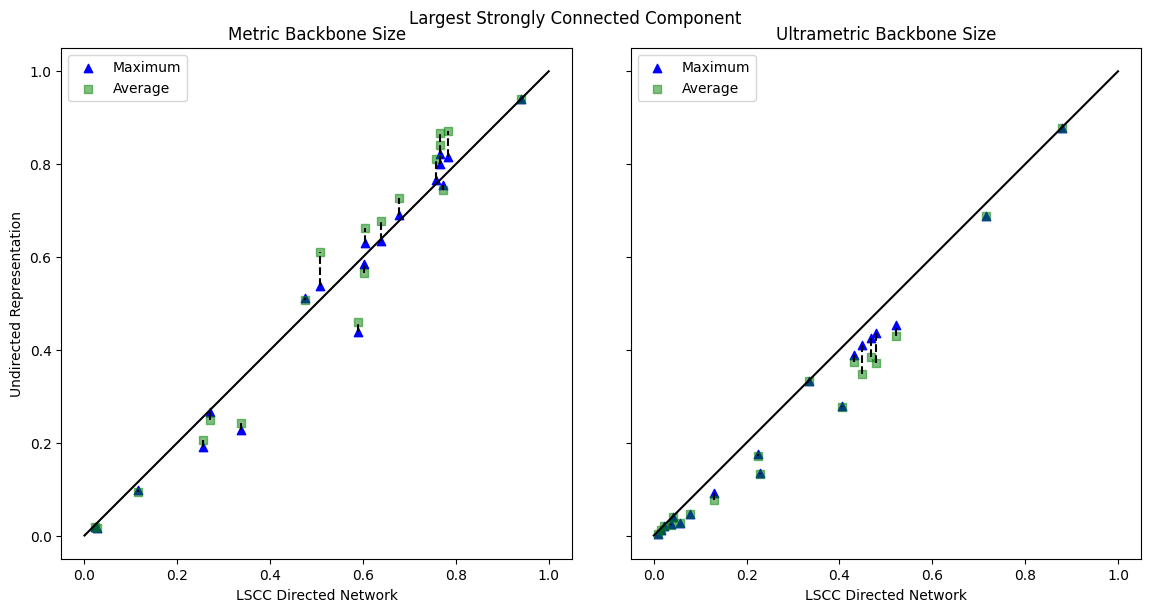

In [70]:

df = pd.read_csv('Summary/BackboneCompareStats_ComparableEdges.csv', index_col=0)
#df = pd.read_csv('Summary/BackboneCompareStats_LargestComponent.csv', index_col=0)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Metric Backbone
ax[0].scatter(df['tau-metric'], df['tau-max-metric'], marker='^', c='b', label='Maximum')
ax[0].scatter(df['tau-metric'], df['tau-avg-metric'], marker='s', c='g', label='Average', alpha=0.5)

ax[0].vlines(df['tau-metric'], ymin=df[['tau-max-metric', 'tau-avg-metric']].min(axis=1), ymax=df[['tau-max-metric', 'tau-avg-metric']].max(axis=1), linestyle='--', color='k')
ax[0].plot([0, 1], [0, 1], 'k-')

ax[0].legend()
ax[0].set_xlabel('LSCC Directed Network')
ax[0].set_ylabel('Undirected Representation')
ax[0].set_title('Metric Backbone Size')
ax[0].set_aspect('equal')

# Ultrametric Backbone
ax[1].scatter(df['tau-ultrametric'], df['tau-max-ultrametric'], marker='^', c='b', label='Maximum')
ax[1].scatter(df['tau-ultrametric'], df['tau-avg-ultrametric'], marker='s', c='g', label='Average', alpha=0.5)

ax[1].vlines(df['tau-ultrametric'], ymin=df[['tau-max-ultrametric', 'tau-avg-ultrametric']].min(axis=1), ymax=df[['tau-max-ultrametric', 'tau-avg-ultrametric']].max(axis=1), linestyle='--', color='k')
ax[1].plot([0, 1], [0, 1], 'k-')

ax[1].legend()
ax[1].set_xlabel('LSCC Directed Network')
#ax[0].set_ylabel('Unirected Representation')
ax[1].set_title('Ultrametric Backbone Size')
ax[1].set_aspect('equal')

#fig.suptitle('Largest Strongly Connected Component')

plt.tight_layout()
plt.show()

### Statistics

Figure suggests that Maximum and Average have larger backbones than directed. How many models agree with this?

In [15]:
n_avg = sum(df['tau-avg-metric'] > df['tau-metric'])
n_max = sum(df['tau-max-metric'] > df['tau-metric'])

print(n_avg, n_max, df.shape[0])

n_avg = sum(df['tau-avg-ultrametric'] > df['tau-ultrametric'])
n_max = sum(df['tau-max-ultrametric'] > df['tau-ultrametric'])

print(n_avg, n_max, df.shape[0])

14 13 19
11 11 19


# Comparability of LSCC and Undirected Versions

Both have the same number of nodes, but do they have the same number of edges even after considering directionality?
In order words, is the number of edges in the undirected graph equal to the number of edges in the LSCC?

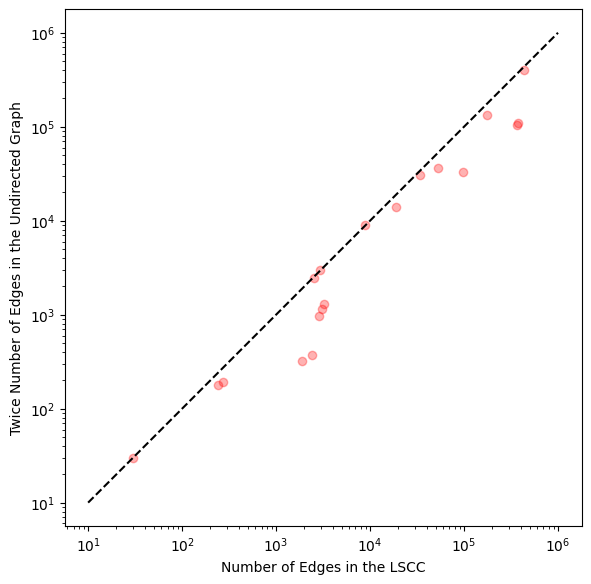

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.loglog(df['n-edges'], 2*df['n-max-edges'], 'ro', alpha=0.3)
ax.loglog([10, 1e6], [10, 1e6], 'k--')
ax.set_aspect('equal')

ax.set_xlabel('Number of Edges in the LSCC')
ax.set_ylabel('Twice Number of Edges in the Undirected Graph')

plt.tight_layout()
plt.show()

In order for an edge to be present in this undirect representation, a finite distance edge has to be present in both directions.
This is only possible in a subset of the LSCC; thus we would expect that the size of the LSCC is a lower bound on the size of this undirected representation. In other words, the points should fall below the identity line.

In [17]:
n = sum(df['n-edges'] >= 2*df['n-max-edges'])
print(n, df.shape[0])

19 19


#### Which components are in the LSCC?

In [18]:
'''
from collections import Counter

for network in networks:
    folder = config[network].get('folder')
    
    rGfile = f'networks/{folder}/network.graphml'
    G = nx.read_graphml(rGfile)
    LSCC = G.subgraph(max(nx.strongly_connected_components(G), key=len))
    
    rGnets = f'networks/{folder}/undirected_networks.pickle'
    U = pk.load(open(rGnets, 'rb'))
    
    cc_sizes = []
    for c in nx.connected_components(U['max']):
        in_lscc = sum([int(LSCC.has_node(n)) for n in c])
        if in_lscc == len(c):
            cc_sizes.append(len(c))
    
    print(network, Counter(cc_sizes))
'''

"\nfrom collections import Counter\n\nfor network in networks:\n    folder = config[network].get('folder')\n    \n    rGfile = f'networks/{folder}/network.graphml'\n    G = nx.read_graphml(rGfile)\n    LSCC = G.subgraph(max(nx.strongly_connected_components(G), key=len))\n    \n    rGnets = f'networks/{folder}/undirected_networks.pickle'\n    U = pk.load(open(rGnets, 'rb'))\n    \n    cc_sizes = []\n    for c in nx.connected_components(U['max']):\n        in_lscc = sum([int(LSCC.has_node(n)) for n in c])\n        if in_lscc == len(c):\n            cc_sizes.append(len(c))\n    \n    print(network, Counter(cc_sizes))\n"

#### Components breaking points

Within the LSCC we have nodes that have a bidirectional connection and are preserved in the undirected representation, while others are within a connected path but don't have this reciprocal relationship (eg.: A->B->C->A). We refer to those non-reciprocally connected edges as breaking points. If the undirect representation has $E_u$ edges and the LSCC has $E_s$ edges then the number of breaking points will be
\begin{equation}
n_{bp} = E_s - 2E_u
\end{equation}

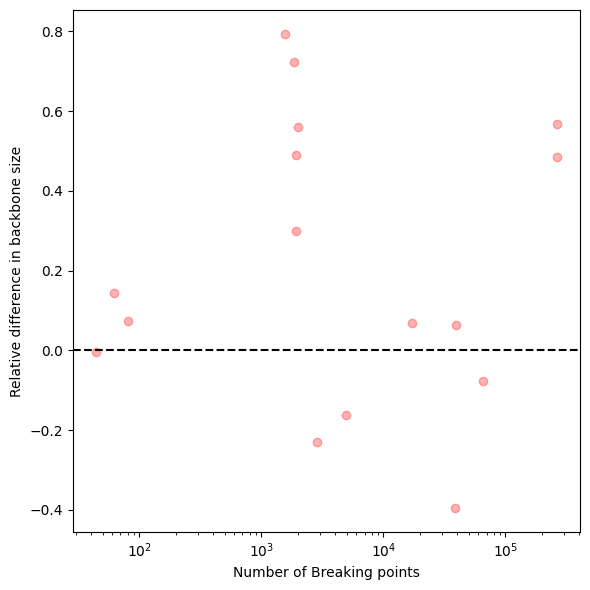

In [19]:
df = pd.read_csv('Summary/BackboneCompareStats_LSCC.csv', index_col=0)

df['n-break'] = df['n-edges'] - 2*df['n-max-edges']

df['rel-diff'] = (df['tau-max-metric']/df['tau-metric'] - 1)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.semilogx(df['n-break'], df['rel-diff'], 'ro', alpha=0.3)
ax.axhline(0.0, linestyle='--', color='k')
#ax.loglog([10, 1e6], [10, 1e6], 'k--')
#ax.set_aspect('equal')

ax.set_xlabel('Number of Breaking points')
ax.set_ylabel('Relative difference in backbone size')

plt.tight_layout()
plt.show()

# Component by Component Comparison

In [20]:
'''
df = pd.DataFrame(index=['n-nodes', 'nd-edges', 'nu-edges', 'tau-metric', 'tau-ultrametric', 
                           'tau-avg-metric', 'tau-avg-ultrametric', 'tau-max-metric', 'tau-max-ultrametric'])

for network in networks:
    folder = config[network].get('folder')
    data = pd.read_csv(f'networks/{folder:s}/undirected_networks-stats.csv', index_col=0).T
    
    for id in data.columns:
        if data[id].min() < 1.0:
            df[f'{network}-{id}'] = data[id]
    
df.T.to_csv('Summary/BackboneCompareStats_Components.csv')
'''

"\ndf = pd.DataFrame(index=['n-nodes', 'nd-edges', 'nu-edges', 'tau-metric', 'tau-ultrametric', \n                           'tau-avg-metric', 'tau-avg-ultrametric', 'tau-max-metric', 'tau-max-ultrametric'])\n\nfor network in networks:\n    folder = config[network].get('folder')\n    data = pd.read_csv(f'networks/{folder:s}/undirected_networks-stats.csv', index_col=0).T\n    \n    for id in data.columns:\n        if data[id].min() < 1.0:\n            df[f'{network}-{id}'] = data[id]\n    \ndf.T.to_csv('Summary/BackboneCompareStats_Components.csv')\n"

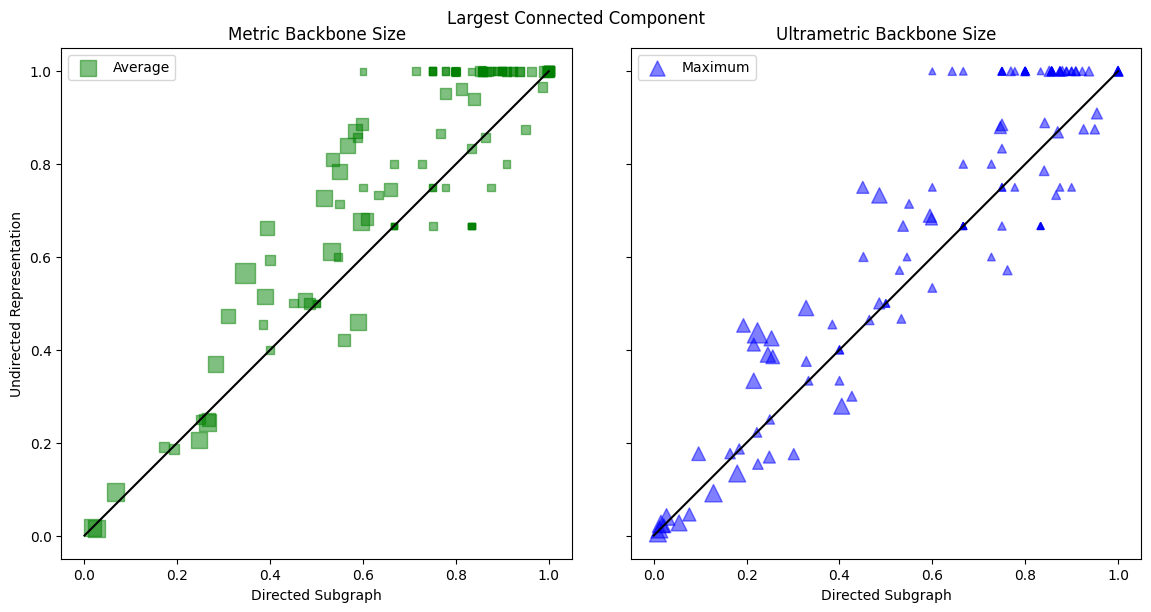

In [21]:
df = pd.read_csv('Summary/BackboneCompareStats_Components.csv', index_col=0)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Metric Backbone
#ax[0].scatter(df['tau-metric'], df['tau-max-metric'], marker='^', c='b', label='Maximum')
ax[0].scatter(df['tau-metric'], df['tau-avg-metric'], marker='s', c='g', label='Average', s=50*np.log10(df['n-nodes']), alpha=0.5)

#ax[0].vlines(df['tau-metric'], ymin=df[['tau-max-metric', 'tau-avg-metric']].min(axis=1), ymax=df[['tau-max-metric', 'tau-avg-metric']].max(axis=1), linestyle='--', color='k')
ax[0].plot([0, 1], [0, 1], 'k-')

ax[0].legend()
ax[0].set_xlabel('Directed Subgraph')
ax[0].set_ylabel('Undirected Representation')
ax[0].set_title('Metric Backbone Size')
ax[0].set_aspect('equal')

# Ultrametric Backbone
ax[1].scatter(df['tau-ultrametric'], df['tau-max-ultrametric'], marker='^', c='b', label='Maximum', s=50*np.log10(df['n-nodes']), alpha=0.5)
#ax[1].scatter(df['tau-ultrametric'], df['tau-avg-ultrametric'], marker='s', c='g', label='Average', alpha=0.5)

#ax[1].vlines(df['tau-ultrametric'], ymin=df[['tau-max-ultrametric', 'tau-avg-ultrametric']].min(axis=1), ymax=df[['tau-max-ultrametric', 'tau-avg-ultrametric']].max(axis=1), linestyle='--', color='k')
ax[1].plot([0, 1], [0, 1], 'k-')

ax[1].legend()
ax[1].set_xlabel('Directed Subgraph')
#ax[0].set_ylabel('Unirected Representation')
ax[1].set_title('Ultrametric Backbone Size')
ax[1].set_aspect('equal')

fig.suptitle('Largest Connected Component')

plt.tight_layout()
plt.show()

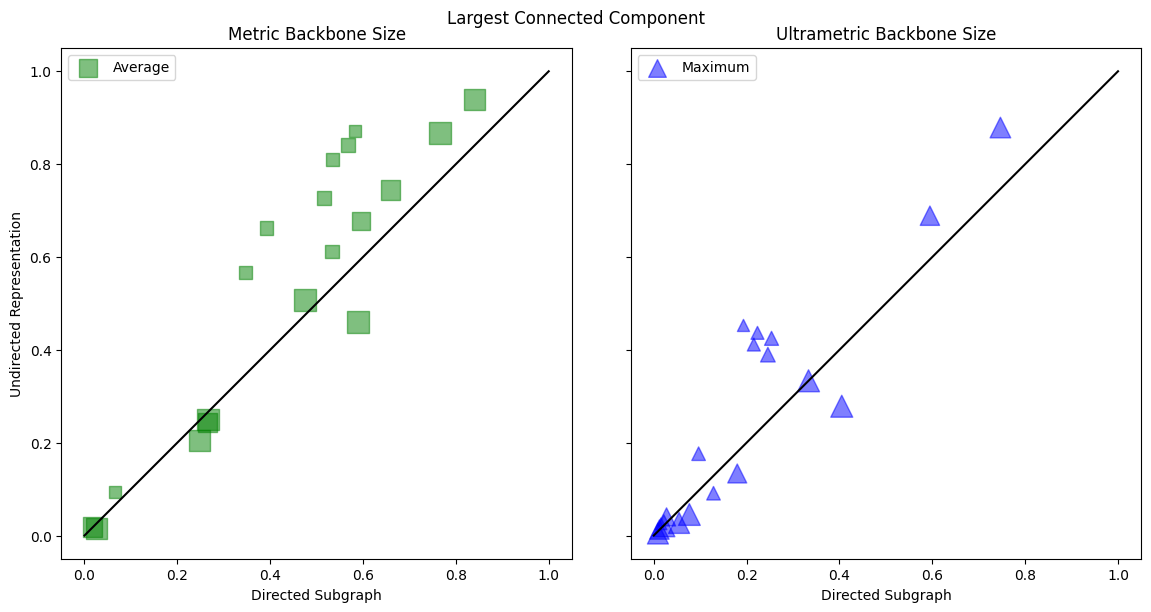

In [22]:
df = pd.read_csv('Summary/BackboneCompareStats_LargestComponent.csv', index_col=0)
df['n-break'] = 2*df['nu-edges']/df['nd-edges']

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Metric Backbone
#ax[0].scatter(df['tau-metric'], df['tau-max-metric'], marker='^', c='b', label='Maximum')
ax[0].scatter(df['tau-metric'], df['tau-avg-metric'], marker='s', c='g', label='Average', s=250*df['n-break'], alpha=0.5)

#ax[0].vlines(df['tau-metric'], ymin=df[['tau-max-metric', 'tau-avg-metric']].min(axis=1), ymax=df[['tau-max-metric', 'tau-avg-metric']].max(axis=1), linestyle='--', color='k')
ax[0].plot([0, 1], [0, 1], 'k-')

ax[0].legend()
ax[0].set_xlabel('Directed Subgraph')
ax[0].set_ylabel('Undirected Representation')
ax[0].set_title('Metric Backbone Size')
ax[0].set_aspect('equal')

# Ultrametric Backbone
ax[1].scatter(df['tau-ultrametric'], df['tau-max-ultrametric'], marker='^', c='b', label='Maximum', s=250*df['n-break'], alpha=0.5)
#ax[1].scatter(df['tau-ultrametric'], df['tau-avg-ultrametric'], marker='s', c='g', label='Average', alpha=0.5)

#ax[1].vlines(df['tau-ultrametric'], ymin=df[['tau-max-ultrametric', 'tau-avg-ultrametric']].min(axis=1), ymax=df[['tau-max-ultrametric', 'tau-avg-ultrametric']].max(axis=1), linestyle='--', color='k')
ax[1].plot([0, 1], [0, 1], 'k-')

ax[1].legend()
ax[1].set_xlabel('Directed Subgraph')
#ax[0].set_ylabel('Unirected Representation')
ax[1].set_title('Ultrametric Backbone Size')
ax[1].set_aspect('equal')

fig.suptitle('Largest Connected Component')

plt.tight_layout()
plt.show()

##### Insert of Ultrametric

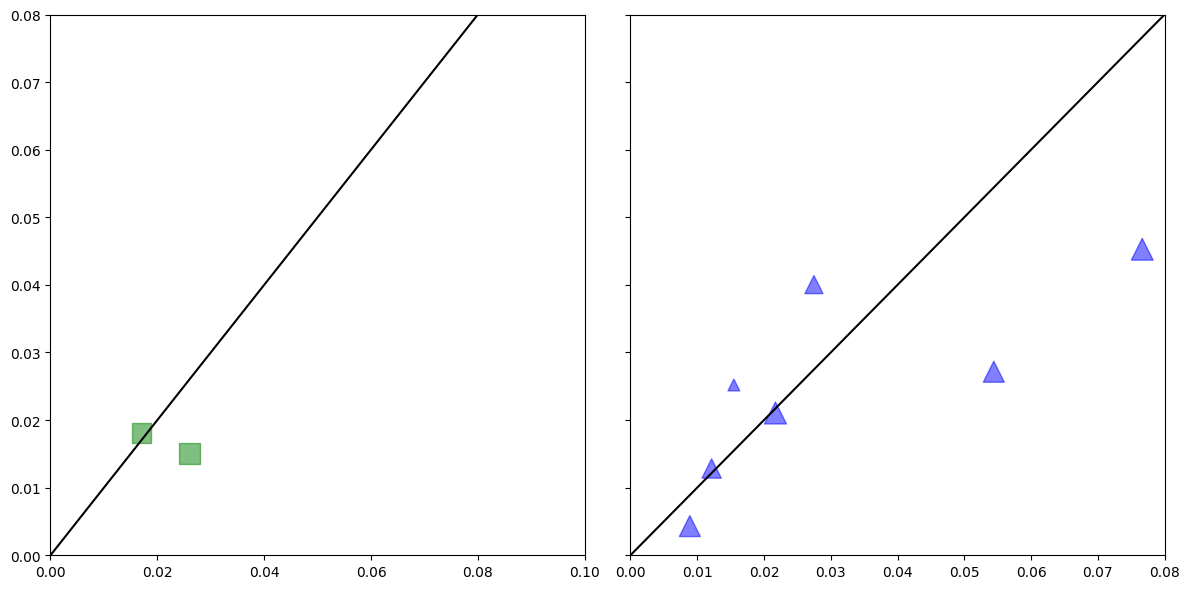

In [23]:
#df = pd.read_csv('Summary/BackboneCompareStats_LargestComponent.csv', index_col=0)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Metric Backbone
#ax[0].scatter(df['tau-metric'], df['tau-max-metric'], marker='^', c='b', label='Maximum')
ax[0].scatter(df['tau-metric'], df['tau-avg-metric'], marker='s', c='g', label='Average', s=250*df['n-break'], alpha=0.5)

#ax[0].vlines(df['tau-metric'], ymin=df[['tau-max-metric', 'tau-avg-metric']].min(axis=1), ymax=df[['tau-max-metric', 'tau-avg-metric']].max(axis=1), linestyle='--', color='k')
ax[0].plot([0, 1], [0, 1], 'k-')

ax[0].set_xlim((0, 0.1))
ax[0].set_ylim((0, 0.1))

# Ultrametric Backbone
ax[1].scatter(df['tau-ultrametric'], df['tau-max-ultrametric'], marker='^', c='b', label='Maximum', s=250*df['n-break'], alpha=0.5)
#ax[1].scatter(df['tau-ultrametric'], df['tau-avg-ultrametric'], marker='s', c='g', label='Average', alpha=0.5)

#ax[1].vlines(df['tau-ultrametric'], ymin=df[['tau-max-ultrametric', 'tau-avg-ultrametric']].min(axis=1), ymax=df[['tau-max-ultrametric', 'tau-avg-ultrametric']].max(axis=1), linestyle='--', color='k')
ax[1].plot([0, 1], [0, 1], 'k-')

ax[1].set_xlim((0, 0.08))
ax[1].set_ylim((0, 0.08))

plt.tight_layout()
plt.show()

## How much this LSCC captures the WCC?

In [24]:
df = pd.read_csv('Summary/CompareSize_LSCC_WCC.csv', index_col=0)
display(df)

,N_WCC,N_LSCC,Percent
Network,,,
bike-sharing,725,723,0.997241
business-faculty,113,84,0.743363
caviar-proj,110,63,0.572727
celegans-her,313,215,0.686901
celegans-male,328,238,0.725610
colombia-calls,863,863,1.000000
colombia-mobility,863,863,1.000000
comorbidity,95,95,1.000000
cs-faculty,206,78,0.378641


### Does the number of break points (relative density) explain the difference?

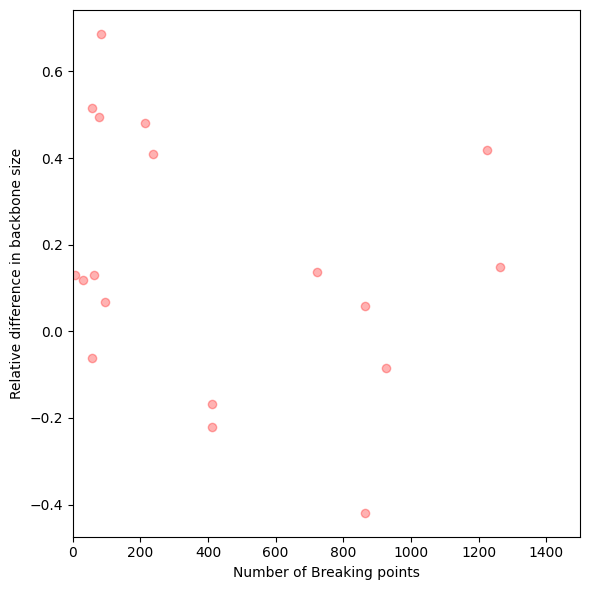

In [25]:
df = pd.read_csv('Summary/BackboneCompareStats_LargestComponent.csv', index_col=0)

# Relative original density.
df['n-break'] = (2*df['nu-edges']/df['nd-edges'])

df['rel-diff'] = df['tau-avg-metric']/df['tau-metric'] - 1

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(df['n-nodes'], df['rel-diff'], 'ro', alpha=0.3)
#ax.axhline(0.0, linestyle='--', color='k')
#ax.loglog([10, 1e6], [10, 1e6], 'k--')
#ax.set_aspect('equal')

ax.set_xlabel('Number of Breaking points')
ax.set_ylabel('Relative difference in backbone size')

ax.set_xlim(0, 1500)

plt.tight_layout()
plt.show()

# Undirected X Directed with comparable edges

In [48]:
df = pd.DataFrame(index=['n-nodes', 'nd-edges', 'nu-edges', 'tau-metric', 'tau-ultrametric', 
                           'tau-avg-metric', 'tau-avg-ultrametric', 'tau-max-metric', 'tau-max-ultrametric'], columns=networks)

for network in networks[:-1]:
    folder = config[network].get('folder')
    data = pd.read_csv(f'networks/{folder:s}/undirected_connected_networks-stats.csv', index_col=0).T    
    #print(data)
    df[network] = data
    
df.T.to_csv('Summary/BackboneCompareStats_ComparableEdges.csv')

In [49]:
df

,business-faculty,cs-faculty,history-faculty,caviar-proj,celegans-her,celegans-male,colombia-calls,colombia-mobility,mobility-manizales,mobility-medellin,tennis-loss,yeast-grn,bike-sharing,giraffe,comorbidity,phone-calls,us-airports,DDI,us-weblinks,host-pathogen
n-nodes,84.000000,78.000000,56.000000,63.000000,215.000000,238.000000,863.000000,863.000000,57.000000,413.000000,1263.000000,1225.000000,723.000000,6.000000,95.000000,30.000000,926.000000,412.000000,18112.000000,NaN
nd-edges,976.000000,358.000000,316.000000,180.000000,1116.000000,1268.000000,399796.000000,134300.000000,2474.000000,31006.000000,32698.000000,104956.000000,36110.000000,30.000000,8930.000000,66.000000,13860.000000,2966.000000,99710.000000,NaN
nu-edges,488.000000,179.000000,158.000000,90.000000,558.000000,634.000000,199898.000000,67150.000000,1237.000000,15503.000000,16349.000000,52478.000000,18055.000000,15.000000,4465.000000,33.000000,6930.000000,1483.000000,49855.000000,NaN
tau-metric,0.604508,0.782123,0.756329,0.772222,0.765233,0.677445,0.027959,0.022115,0.271221,0.256273,0.507799,0.116306,0.639684,0.766667,0.474356,0.939394,0.336652,0.590020,0.601785,NaN
tau-ultrametric,0.224385,0.522346,0.449367,0.716667,0.466846,0.431388,0.009622,0.015748,0.078011,0.057311,0.130130,0.036692,0.040570,0.333333,0.021725,0.878788,0.228571,0.404922,0.479711,NaN
tau-avg-metric,0.661885,0.871508,0.810127,0.744444,0.840502,0.727129,0.015118,0.018094,0.249798,0.205380,0.611414,0.093925,0.676765,0.866667,0.506831,0.939394,0.243146,0.459879,0.565801,NaN
tau-avg-ultrametric,0.172131,0.430168,0.348101,0.688889,0.383513,0.373817,0.004312,0.012837,0.045271,0.026640,0.077558,0.023324,0.039989,0.333333,0.021053,0.878788,0.133478,0.277141,0.371858,NaN
tau-max-metric,0.629098,0.815642,0.765823,0.755556,0.820789,0.690852,0.015703,0.018183,0.265158,0.189770,0.537648,0.098384,0.635392,0.800000,0.511758,0.939394,0.226840,0.438975,0.585017,NaN
tau-max-ultrametric,0.176230,0.452514,0.411392,0.688889,0.424731,0.389590,0.004317,0.012837,0.045271,0.027156,0.091076,0.025192,0.040044,0.333333,0.021053,0.878788,0.133622,0.278490,0.436546,NaN


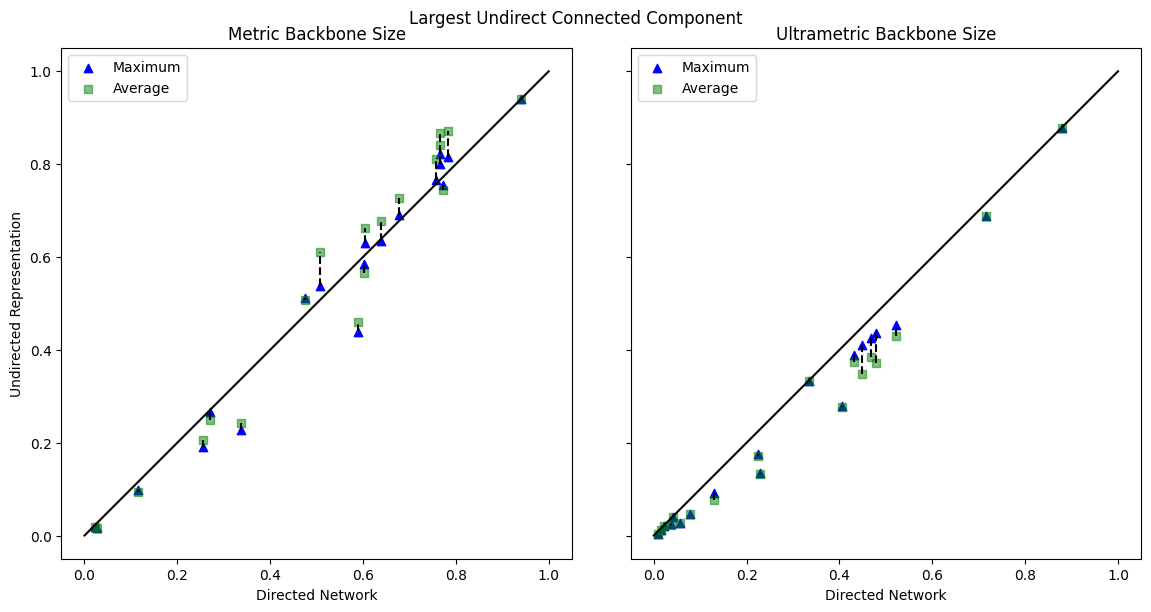

In [71]:
df = pd.read_csv('Summary/BackboneCompareStats_ComparableEdges.csv', index_col=0)
#df = pd.read_csv('Summary/BackboneCompareStats_LargestComponent.csv', index_col=0)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Metric Backbone
ax[0].scatter(df['tau-metric'], df['tau-max-metric'], marker='^', c='b', label='Maximum')
ax[0].scatter(df['tau-metric'], df['tau-avg-metric'], marker='s', c='g', label='Average', alpha=0.5)

ax[0].vlines(df['tau-metric'], ymin=df[['tau-max-metric', 'tau-avg-metric']].min(axis=1), ymax=df[['tau-max-metric', 'tau-avg-metric']].max(axis=1), linestyle='--', color='k')
ax[0].plot([0, 1], [0, 1], 'k-')

ax[0].legend()
ax[0].set_xlabel('Directed Network')
ax[0].set_ylabel('Undirected Representation')
ax[0].set_title('Metric Backbone Size')
ax[0].set_aspect('equal')

# Ultrametric Backbone
ax[1].scatter(df['tau-ultrametric'], df['tau-max-ultrametric'], marker='^', c='b', label='Maximum')
ax[1].scatter(df['tau-ultrametric'], df['tau-avg-ultrametric'], marker='s', c='g', label='Average', alpha=0.5)

ax[1].vlines(df['tau-ultrametric'], ymin=df[['tau-max-ultrametric', 'tau-avg-ultrametric']].min(axis=1), ymax=df[['tau-max-ultrametric', 'tau-avg-ultrametric']].max(axis=1), linestyle='--', color='k')
ax[1].plot([0, 1], [0, 1], 'k-')

ax[1].legend()
ax[1].set_xlabel('Directed Network')
#ax[0].set_ylabel('Unirected Representation')
ax[1].set_title('Ultrametric Backbone Size')
ax[1].set_aspect('equal')

fig.suptitle('Largest Undirect Connected Component')

plt.tight_layout()
plt.show()

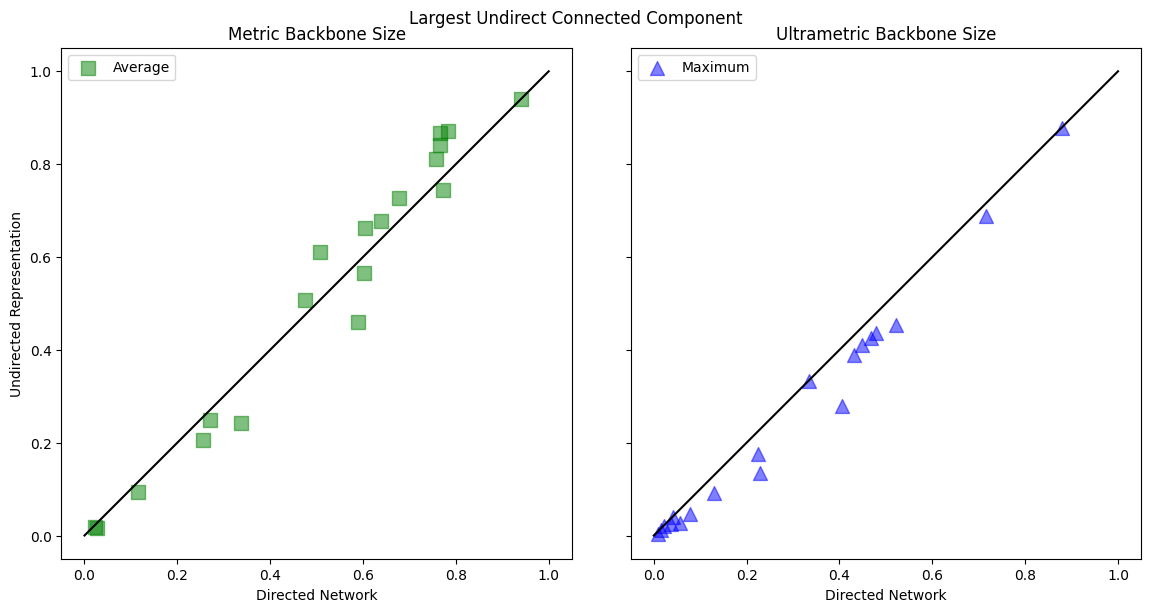

In [61]:
#df = pd.read_csv('Summary/BackboneCompareStats_LargestComponent.csv', index_col=0)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Metric Backbone
#ax[0].scatter(df['tau-metric'], df['tau-max-metric'], marker='^', c='b', label='Maximum')
ax[0].scatter(df['tau-metric'], df['tau-avg-metric'], marker='s', c='g', label='Average', s=100, alpha=0.5)

#ax[0].vlines(df['tau-metric'], ymin=df[['tau-max-metric', 'tau-avg-metric']].min(axis=1), ymax=df[['tau-max-metric', 'tau-avg-metric']].max(axis=1), linestyle='--', color='k')
ax[0].plot([0, 1], [0, 1], 'k-')

ax[0].legend()
ax[0].set_xlabel('Directed Network')
ax[0].set_ylabel('Undirected Representation')
ax[0].set_title('Metric Backbone Size')
ax[0].set_aspect('equal')

# Ultrametric Backbone
ax[1].scatter(df['tau-ultrametric'], df['tau-max-ultrametric'], marker='^', c='b', label='Maximum', s=100, alpha=0.5)
#ax[1].scatter(df['tau-ultrametric'], df['tau-avg-ultrametric'], marker='s', c='g', label='Average', alpha=0.5)

#ax[1].vlines(df['tau-ultrametric'], ymin=df[['tau-max-ultrametric', 'tau-avg-ultrametric']].min(axis=1), ymax=df[['tau-max-ultrametric', 'tau-avg-ultrametric']].max(axis=1), linestyle='--', color='k')
ax[1].plot([0, 1], [0, 1], 'k-')

ax[1].legend()
ax[1].set_xlabel('Directed Network')
#ax[0].set_ylabel('Unirected Representation')
ax[1].set_title('Ultrametric Backbone Size')
ax[1].set_aspect('equal')

fig.suptitle('Largest Undirect Connected Component')

plt.tight_layout()
plt.show()

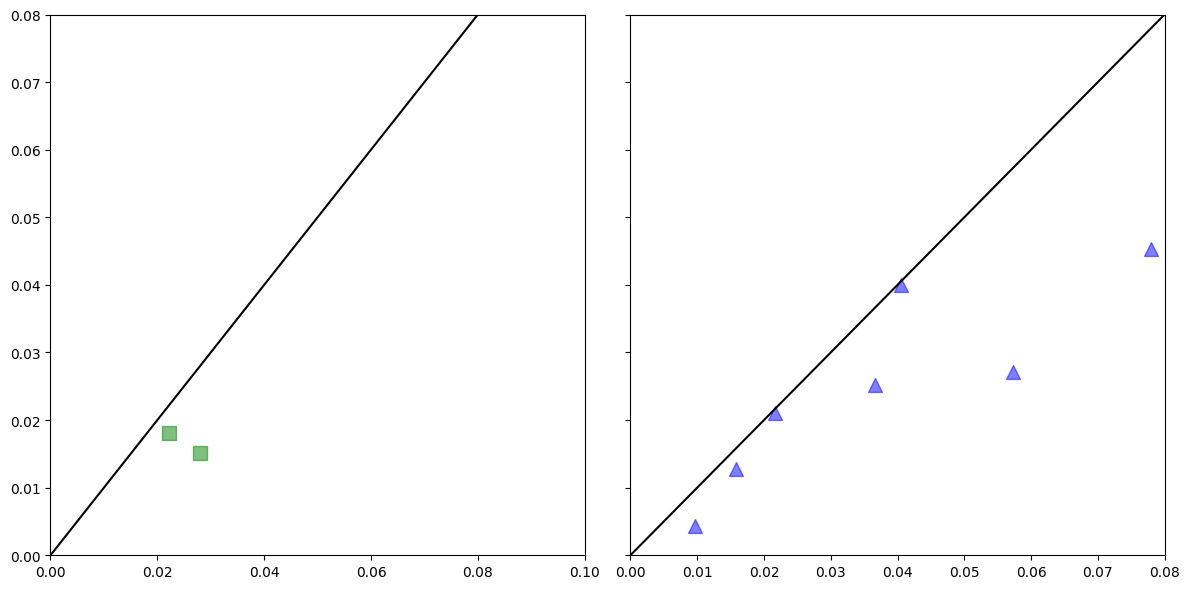

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Metric Backbone
#ax[0].scatter(df['tau-metric'], df['tau-max-metric'], marker='^', c='b', label='Maximum')
ax[0].scatter(df['tau-metric'], df['tau-avg-metric'], marker='s', c='g', label='Average', s=100, alpha=0.5)

#ax[0].vlines(df['tau-metric'], ymin=df[['tau-max-metric', 'tau-avg-metric']].min(axis=1), ymax=df[['tau-max-metric', 'tau-avg-metric']].max(axis=1), linestyle='--', color='k')
ax[0].plot([0, 1], [0, 1], 'k-')

ax[0].set_xlim((0, 0.1))
ax[0].set_ylim((0, 0.1))

# Ultrametric Backbone
ax[1].scatter(df['tau-ultrametric'], df['tau-max-ultrametric'], marker='^', c='b', label='Maximum', s=100, alpha=0.5)
#ax[1].scatter(df['tau-ultrametric'], df['tau-avg-ultrametric'], marker='s', c='g', label='Average', alpha=0.5)

#ax[1].vlines(df['tau-ultrametric'], ymin=df[['tau-max-ultrametric', 'tau-avg-ultrametric']].min(axis=1), ymax=df[['tau-max-ultrametric', 'tau-avg-ultrametric']].max(axis=1), linestyle='--', color='k')
ax[1].plot([0, 1], [0, 1], 'k-')

ax[1].set_xlim((0, 0.08))
ax[1].set_ylim((0, 0.08))

plt.tight_layout()
plt.show()

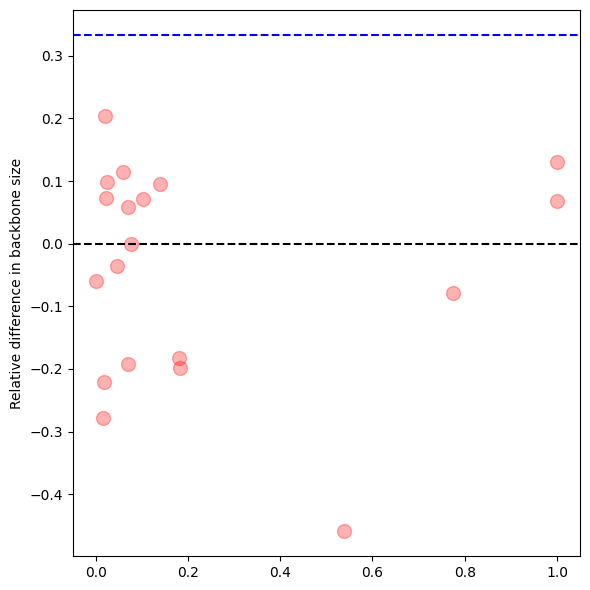

In [66]:
df['rel-diff'] = df['tau-avg-metric']/df['tau-metric'] - 1
df['density'] = df['nd-edges']/(df['n-nodes']*(df['n-nodes']-1))

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter(df['density'], df['rel-diff'], marker='o', c='r', s=100, alpha=0.3)
#ax.loglog([10, 1e6], [10, 1e6], 'k--')
#ax.set_aspect('equal')

ax.axhline(0.0, linestyle='--', color='k')
ax.axhline(1./3., linestyle='--', color='b')

#ax.set_xlabel('Number of Breaking points')
ax.set_ylabel('Relative difference in backbone size')

#ax.set_xlim(0, 1500)

plt.tight_layout()
plt.show()

In [69]:
df.sort_values(by=['rel-diff'], ascending=False)

,n-nodes,nd-edges,nu-edges,tau-metric,tau-ultrametric,tau-avg-metric,tau-avg-ultrametric,tau-max-metric,tau-max-ultrametric,rel-diff,density
tennis-loss,1263.0,32698.0,16349.0,0.507799,0.130130,0.611414,0.077558,0.537648,0.091076,0.204047,0.020514
giraffe,6.0,30.0,15.0,0.766667,0.333333,0.866667,0.333333,0.800000,0.333333,0.130435,1.000000
cs-faculty,78.0,358.0,179.0,0.782123,0.522346,0.871508,0.430168,0.815642,0.452514,0.114286,0.059607
celegans-her,215.0,1116.0,558.0,0.765233,0.466846,0.840502,0.383513,0.820789,0.424731,0.098361,0.024256
business-faculty,84.0,976.0,488.0,0.604508,0.224385,0.661885,0.172131,0.629098,0.176230,0.094915,0.139989
celegans-male,238.0,1268.0,634.0,0.677445,0.431388,0.727129,0.373817,0.690852,0.389590,0.073341,0.022480
history-faculty,56.0,316.0,158.0,0.756329,0.449367,0.810127,0.348101,0.765823,0.411392,0.071130,0.102597
comorbidity,95.0,8930.0,4465.0,0.474356,0.021725,0.506831,0.021053,0.511758,0.021053,0.068461,1.000000
bike-sharing,723.0,36110.0,18055.0,0.639684,0.040570,0.676765,0.039989,0.635392,0.040044,0.057968,0.069175
phone-calls,30.0,66.0,33.0,0.939394,0.878788,0.939394,0.878788,0.939394,0.878788,0.000000,0.075862
